In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio

# Read Seis

In [2]:
seis = segyio.tools.cube('/home/zhangzr/FaultRecongnition/Fault_data/real_data/seis.sgy')
# seis = (seis - np.mean(seis)) / np.std(seis)

# Visualize Predictions

In [3]:
with h5py.File('/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/unetr_base_supbaseline_p16_fault_random_aug/test_preds/seis.h5', 'r') as f:
    unetr_baseline_pred = f['predictions'][:]
with h5py.File('/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Finetune/unetr_base_vitmae_p16_m0.75_fault_random_aug/test_preds/seis.h5', 'r') as f:
    unetr_pretrained_pred = f['predictions'][:]

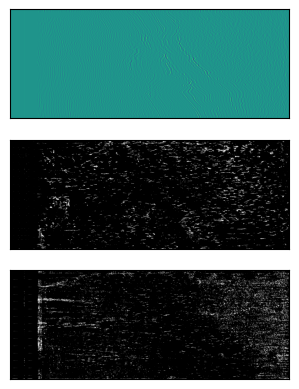

In [4]:
slice_id = 99
plt.subplot(3,1,1)
fig = plt.imshow(seis[slice_id,:,:])
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,2)
fig = plt.imshow(1-unetr_baseline_pred[slice_id,:,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,3)
fig = plt.imshow(1-unetr_pretrained_pred[slice_id,:,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

In [5]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx]

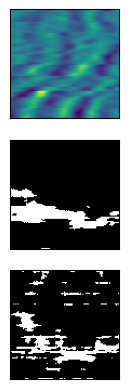

In [6]:
slice_id = 500
plt.subplot(3,1,1)
fig = plt.imshow(crop_center(seis[:,slice_id,:], 101, 101))
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,2)
fig = plt.imshow(1-crop_center(unetr_baseline_pred[:,slice_id,:], 101, 101), cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(3,1,3)
fig = plt.imshow(1-crop_center(unetr_pretrained_pred[:,slice_id,:], 101, 101), cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Validation data

In [14]:
ids = 274
with h5py.File(f'/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data/crop/val/{ids}.h5', 'r') as f:
    seis = f['raw'][:]
    gt = f['label'][:]

with h5py.File(f'/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Baseline/unetr_base_supbaseline_p16_fault_random_aug/preds/{ids}.h5', 'r') as f:
    unetr_baseline_pred = f['predictions'][:]

with h5py.File(f'/home/zhangzr/FaultRecongnition/MIM-Med3D/output/Fault_Finetune/unetr_base_vitmae_p16_m0.75_fault_random_aug/preds/{ids}.h5', 'r') as f:
    unetr_pretrained_pred = f['predictions'][:]

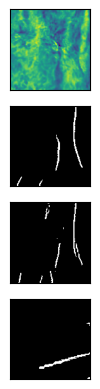

In [23]:
slice_id = 20
plt.subplot(4,1,1)
fig = plt.imshow(seis[:,:,slice_id])
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,2)
fig = plt.imshow(1-unetr_baseline_pred[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,3)
fig = plt.imshow(1-unetr_pretrained_pred[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(4,1,4)
fig = plt.imshow(1-gt[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()